This notebook runs the experiments of the other notebook with names in Hindi script. (essentially an attempt at feature engineering)

Pronunciations of Hindi characters are more consistent than the combinations of English characters used to represent them, and this might help the models learn better.

An issue may be that the library used for transliteration does not do a well enough job in converting the names. For instance, incorrectly converting 'u' between 'ु' and 'ू'.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from nltk.probability import FreqDist

In [3]:
RANDOM_STATE=0

In [4]:
df = pd.read_csv('15000_demoscrape.csv', index_col=0)

# Library for transliteration

In [5]:
top5names = df['Name'].value_counts()[:5].index
top5names

Index(['rajesh', 'ashok', 'vijay', 'amit', 'abhishek'], dtype='object')

In [6]:
top5surnames = df['Surname'].value_counts()[:5].index
top5surnames

Index(['singh', 'jain', 'das', 'patel', 'shah'], dtype='object')

* Using the [Translate library](https://pypi.org/project/translate/) 

In [5]:
from translate import Translator
translator = Translator(to_lang="hi")

In [6]:
for name in top5names:
    print(translator.translate(name))

NameError: name 'top5names' is not defined

In [9]:
for surname in top5surnames:
    print(translator.translate(surname))

दीप्ति
जैन
à¤¨à¥à¤¯à¥à¤à¥à¤°à¥à¤¨
पटेल
शाह


In [10]:
print('Rajesh', translator.translate("Rajesh"))
print("Singh", translator.translate("Singh"))
print("Das", translator.translate("Das"))
print("Neha", translator.translate("Neha"))

Rajesh फिलिपिनो में सुरक्षा गार्ड के 11 जनरल के आदेश
Singh सिंह
Das दास
Neha Neha


Translate library fails in unexpected ways and is therefore unusable, for example;
* Some names are given a meaning instead (like with Rajesh)
* Some names fail depending on capitalisation
* Some names fail completely, where the output is in English (like with Neha)

* Using [Transliteration module in polyglot library](https://polyglot.readthedocs.io/en/latest/Transliteration.html#example)

Reference issue if installing on Windows;
https://github.com/aboSamoor/polyglot/issues/57

In [ ]:
from polyglot.transliteration import Transliterator
from polyglot.text import Text

In [ ]:
hindi_t = Transliterator(source_lang='en', target_lang='hi')

In [13]:
for name in top5names:
    print(hindi_t.transliterate(name))

राजेश
ाशोक
विजय
ामित
ाबहिशेक


In [14]:
for surname in top5surnames:
    print(hindi_t.transliterate(surname))

सिंह
जािन
दास
पटेल
शाह


Library struggles with 'अ' and combination characters like "भ" but does a decent job overall.

The consistency of the failures may lead to them not affecting the learning significantly.

* Another alternative which I have not tried yet; https://pypi.org/project/indic-transliteration/

# Data Cleaning

Filtering out names that have non alphabetic characters or are less than 3 characters long

In [17]:
def valid_name(name):
    valid_chars="abcdefghijklmnopqrstuvwxyz"
    if(len(name)<=2):
        return False
    for ch in name:
        if ch not in valid_chars:
            return False
    return True

In [18]:
firstnames_mask = df['Name'].apply(valid_name)

In [19]:
surnames_mask = df['Surname'].apply(valid_name)

In [20]:
fullnames_mask = [fn and sn for fn,sn in zip(firstnames_mask,surnames_mask)]

# Generating Hindi names

In [38]:
df['hindi_Name'] = [np.NaN]*len(df)
df['hindi_Name'] = df['Name'][firstnames_mask].apply(hindi_t.transliterate)

In [42]:
df['hindi_Surname'] = [np.NaN]*len(df)
df['hindi_Surname'] = df['Surname'][surnames_mask].apply(hindi_t.transliterate)

In [50]:
df

,Name,Surname,Community,hindi_Name,hindi_Surname
0,yogita,singh,punjabi,योगिता,सिंह
1,dibyendu,ghosh,bengali,दीबयेनदु,गहोश
2,veeramony,ramachandran,tamil,वीरामोनी,रामाचानद्रन
3,amlan,datta,bengali,ामलान,दट्टा
4,susmita,poddar,bengali,सुसमिता,पोददार
5,raja,banik,bengali,राजा,बानिक
6,rekha,jain,hindi,रेखा,जािन
7,subrato,roy,bengali,सुबरतो,रॉय
8,dinesh,tiwari,hindi,दीनेश,तिवारी
9,shampa,chakraborty,bengali,शामपा,चाकराबोर्टय


In [49]:
import pickle
with open('df.pickle', 'wb') as handle:
    pickle.dump(df.to_dict(), handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
# or reload preprocessed dict from saved pickle
import pickle
with open('df.pickle', 'rb') as handle:
    df = pd.DataFrame(pickle.load(handle))

# Exploring n-grams

Exploring name bigrams

In [8]:
def get_ngrams(words, n):
    return [word[i:i+n]  for word in words for i in range(len(word)-n+1)]

In [9]:
def get_mask_indices(mask):
    return np.argwhere(mask).reshape(1,-1)[0]

In [24]:
firstname_bigrams = get_ngrams(df['Name'][firstnames_mask], 2)

In [25]:
hindi_firstname_bigrams = get_ngrams(df['hindi_Name'][firstnames_mask], 2)

In [22]:
pd.Series(firstname_bigrams).value_counts()

sh    3661
an    3638
ra    2906
ha    2417
ar    1801
ma    1518
na    1375
it    1350
ee    1333
as    1172
am    1165
nd    1157
in    1150
sa    1137
hi    1114
ta    1112
ka    1087
ni    1069
al    1001
vi     989
es     986
aj     901
su     899
ri     886
ja     842
is     810
pr     796
ya     769
en     757
de     744
      ... 
wk       1
jl       1
zs       1
jb       1
kn       1
wq       1
xa       1
vg       1
hg       1
cq       1
fs       1
dl       1
hz       1
vm       1
vc       1
mz       1
cs       1
eu       1
bw       1
qs       1
gc       1
cv       1
fz       1
rq       1
gp       1
ci       1
gg       1
uu       1
vp       1
zy       1
Length: 484, dtype: int64

In [47]:
pd.Series(hindi_firstname_bigrams).value_counts()

ान    2527
रा    1770
ार    1546
ित    1301
ना    1225
मा    1219
वि    1046
ाम    1033
िन     995
्र     967
सा     964
ाज     946
ेश     919
सु     899
ाल     877
का     863
नि     832
ता     815
हि     809
रि     773
सह     710
पा     661
शा     646
या     622
दी     593
ास     590
िक     556
वा     554
ेन     546
मि     519
      ... 
फम       1
फअ       1
फट       1
शग       1
ईब       1
टप       1
ूफ       1
भौ       1
हप       1
शु       1
बं       1
टक       1
फश       1
बअ       1
चु       1
कप       1
यब       1
तब       1
लं       1
लौ       1
जै       1
षर       1
शू       1
ीी       1
ईर       1
थप       1
ॉम       1
णी       1
हथ       1
थक       1
Length: 872, dtype: int64

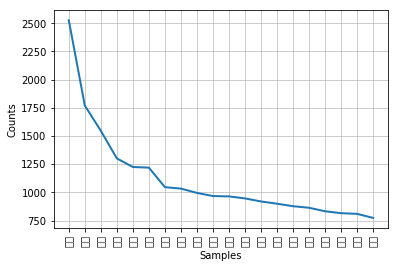

In [71]:
fd_fnbigrams=FreqDist(hindi_firstname_bigrams)
fd_fnbigrams.plot(20)

In [72]:
surname_bigrams = get_ngrams(df['Surname'][surnames_mask], 2)

In [73]:
hindi_surname_bigrams = get_ngrams(df['hindi_Surname'][surnames_mask], 2)

In [74]:
pd.Series(surname_bigrams).value_counts()

ha    2992
ar    2548
an    2276
in    2175
ra    2156
sh    1753
gh    1655
si    1613
ng    1566
ma    1454
al    1381
at    1163
pa    1098
ai    1067
wa    1034
as    1033
sa     945
na     863
ri     856
ka     851
ja     850
da     834
ch     830
ta     794
ah     769
nd     679
va     573
er     572
de     564
ga     550
      ... 
qi       1
tg       1
dj       1
kn       1
oq       1
fu       1
jl       1
fz       1
bj       1
vt       1
yr       1
db       1
wb       1
ys       1
td       1
bg       1
gs       1
kc       1
ci       1
io       1
xa       1
bc       1
wt       1
cu       1
ps       1
dv       1
tm       1
vg       1
mw       1
jb       1
Length: 454, dtype: int64

In [75]:
pd.Series(hindi_surname_bigrams).value_counts()

ार    2049
रा    1711
सि    1625
िं    1491
ान    1444
ंह    1434
वा    1316
मा    1259
ाल    1242
ाि     987
सा     871
जा     819
ास     816
ना     783
पा     727
ाह     697
हा     682
िन     636
दा     601
रि     531
गा     518
री     502
्र     502
या     498
्ट     497
ाव     495
शा     484
र्     462
ला     459
का     456
      ... 
सद       1
सॉ       1
टी       1
डस       1
यौ       1
दौ       1
जल       1
णव       1
धह       1
ईख       1
णघ       1
वब       1
फज       1
ैं       1
धअ       1
यड       1
फद       1
ाी       1
णि       1
ूय       1
शद       1
फड       1
ईं       1
वु       1
यग       1
डल       1
़त       1
डग       1
वअ       1
ेा       1
Length: 763, dtype: int64

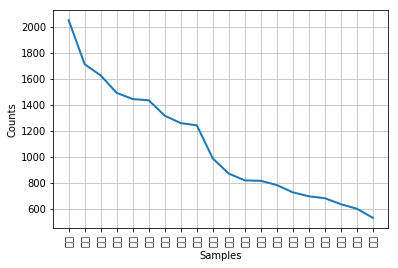

In [76]:
fd_sntrigrams=FreqDist(hindi_surname_bigrams)
fd_sntrigrams.plot(20)

# Training Classifiers

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
# getting labels (a number for each community)
le = LabelEncoder()

In [12]:
labels = le.fit_transform(df['Community'])

In [13]:
class Classifier:
    count = 0
    
    def __init__(self, name, description=""):
        self.name = name
        self.description = description
        self.vectorizer = CountVectorizer()
        self.metrics = {'accuracy': accuracy_score}
        self.scores = {}
        Classifier.count = Classifier.count + 1
        
    def fit(self, x, y, clf, vectorizer=None, metrics_dict=None):
        if vectorizer is not None:
            self.vectorizer = vectorizer
        if metrics_dict is not None:
            self.metrics.update(metrics_dict)
            
        x = self.vectorizer.fit_transform(x)
        self.clf = clf.fit(x,y)
        
        self.scores['train'] = {}
        for metric, metric_fn in self.metrics.items():
            self.scores['train'][metric] = metric_fn(y, self.clf.predict(x))
        
        self.print_scores('train')
        
    def predict(self, x):
        x = self.vectorizer.transform(x)
        return self.clf.predict(x)
    
    def score(self, x, y, data_set='dev', metrics_dict=None):
        if metrics_dict is not None:
            self.metrics.update(metrics_dict)
        
        self.scores[data_set] = {}
        for metric, metric_fn in self.metrics.items():
            self.scores[data_set][metric] = metric_fn(y, self.predict(x))
        
        self.print_scores(data_set)
        
        
    def print_scores(self, data_set):
        if data_set in self.scores:
            print('Scores on',data_set)
            scores_dict = self.scores[data_set]
            for metric, score in scores_dict.items():
                print(metric, "=", score)
        else:
            print('No scores available')
        print()
        
    def get_scores(self):
        for data_set in self.scores.keys():
            self.print_scores(data_set)
        
    def add_method(self, name, method):
        self.__setattr__(name, method)

## Naive Bayes

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

In [15]:
metrics_dict = {'f1_all':lambda y,y_pred: f1_score(y, y_pred, average=None, labels=list(range(25))), 
                'f1_micro':lambda y,y_pred: f1_score(y, y_pred, average='micro'),
                'f1_macro':lambda y,y_pred: f1_score(y, y_pred, average='macro'),
                'f1_weighted':lambda y,y_pred: f1_score(y, y_pred, average='weighted')}

In [83]:
X_train, X_dev, y_train, y_dev = train_test_split(df['hindi_Name'][firstnames_mask].values, labels[firstnames_mask], random_state = RANDOM_STATE)

In [25]:
clfs = {}

In [85]:
clfs['nb_fn_2'] = Classifier('nb_fn_2', description="naive bayes on first name bigrams")
clfs['nb_fn_2'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams([x],2)), metrics_dict=metrics_dict)
clfs['nb_fn_2'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

Scores on train
accuracy = 0.3908812398630384
f1_all = [0.         0.42476817 0.121673   0.         0.32299125 0.
 0.47253353 0.26822157 0.         0.         0.         0.30117647
 0.33060109 0.14975042 0.         0.         0.24968474 0.
 0.         0.38410596 0.38554217 0.32794457 0.43027027 0.
 0.48034934]
f1_micro = 0.3908812398630384
f1_macro = 0.1937338569432503
f1_weighted = 0.3742133885308534

Scores on dev
accuracy = 0.3435135135135135
f1_all = [0.         0.39788732 0.15584416 0.         0.26424242 0.
 0.42702703 0.17741935 0.         0.         0.         0.24390244
 0.30350195 0.04210526 0.         0.         0.15789474 0.
 0.         0.33948339 0.20895522 0.30405405 0.38611714 0.
 0.34693878]
f1_micro = 0.3435135135135135
f1_macro = 0.16327709806016957
f1_weighted = 0.3256426162769327



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [88]:
clfs['nb_fn_3'] = Classifier('nb_fn_3', description="naive bayes on first name trigrams")
clfs['nb_fn_3'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams([x],3)), metrics_dict=metrics_dict)
clfs['nb_fn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

Scores on train
accuracy = 0.5298251937285997
f1_all = [0.         0.6276176  0.29268293 0.         0.47623019 0.
 0.5743366  0.41551247 0.         0.5        0.         0.4576659
 0.40849673 0.31641791 0.         0.         0.41388175 0.
 0.         0.51186992 0.29787234 0.47478992 0.56423841 0.
 0.65758092]
f1_micro = 0.5298251937285997
f1_macro = 0.29121639964098595
f1_weighted = 0.5153510609376355

Scores on dev
accuracy = 0.41
f1_all = [0.         0.5045045  0.25       0.         0.32305795 0.
 0.49558442 0.21052632 0.         0.75       0.         0.304
 0.30901288 0.02970297 0.         0.         0.22535211 0.
 0.         0.40038314 0.17857143 0.37082067 0.42812823 0.
 0.49079755]
f1_micro = 0.41
f1_macro = 0.2291496593137238
f1_weighted = 0.3884855810404465



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [117]:
clfs['nb_fn_23'] = Classifier('nb_fn_23', description="naive bayes on first name bigrams and trigrams")
clfs['nb_fn_23'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams([x],2)+get_ngrams([x],3)), metrics_dict=metrics_dict)
clfs['nb_fn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on train
accuracy = 0.4517030095512705
f1_all = [0.         0.503961   0.25165563 0.         0.40315908 0.
 0.5279661  0.28871391 0.         0.47826087 0.66666667 0.41269841
 0.34138973 0.22916667 0.         0.         0.36383208 0.
 0.         0.43124597 0.4372093  0.37083708 0.49455041 0.
 0.58187135]
f1_micro = 0.4517030095512705
f1_macro = 0.2826326770610507
f1_weighted = 0.4418599427467069

Scores on dev
accuracy = 0.3854054054054054
f1_all = [0.         0.44484305 0.21686747 0.         0.32685714 0.
 0.50184049 0.21538462 0.         0.5        0.         0.28571429
 0.2578125  0.00943396 0.         0.         0.24087591 0.
 0.         0.37335835 0.275      0.34482759 0.42650104 0.
 0.37837838]
f1_micro = 0.3854054054054054
f1_macro = 0.2085954251036278
f1_weighted = 0.37112920133719385



In [89]:
X_train, X_dev, y_train, y_dev = train_test_split(df['hindi_Surname'][surnames_mask].values, labels[surnames_mask], random_state = RANDOM_STATE)

In [90]:
clfs['nb_sn_2'] = Classifier('nb_sn_2', description="naive bayes on surname bigrams")
clfs['nb_sn_2'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams([x],2)), metrics_dict=metrics_dict)
clfs['nb_sn_2'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on train
accuracy = 0.5991949910554561
f1_all = [0.21428571 0.67556403 0.28571429 0.         0.64361898 0.
 0.52366376 0.56542056 0.         0.         0.         0.67241379
 0.53286385 0.5192604  0.         0.         0.71596032 0.
 0.         0.74229425 0.20512821 0.5093046  0.52808169 0.
 0.59084195]
f1_micro = 0.5991949910554561
f1_macro = 0.31697665588911006
f1_weighted = 0.5952188781433485

Scores on dev
accuracy = 0.5760665414542527
f1_all = [0.33333333 0.64769382 0.1443299  0.         0.64563617 0.
 0.47666906 0.47272727 0.         0.         0.         0.69090909
 0.46212121 0.52009456 0.         0.         0.66666667 0.
 0.         0.7645479  0.05714286 0.47588424 0.49060543 0.
 0.51282051]
f1_micro = 0.5760665414542527
f1_macro = 0.36805910116380247
f1_weighted = 0.5700921061817968



In [91]:
clfs['nb_sn_3'] = Classifier('nb_sn_3', description="naive bayes on surname trigrams")
clfs['nb_sn_3'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams([x],3)), metrics_dict=metrics_dict)
clfs['nb_sn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

Scores on train
accuracy = 0.7161001788908765
f1_all = [0.375      0.7989838  0.38795987 0.         0.78976641 0.
 0.62158956 0.71394799 0.         0.10526316 0.         0.72689076
 0.71239471 0.58814103 0.         0.         0.77340824 0.
 0.         0.81599536 0.43410853 0.66530194 0.67715356 0.
 0.76175549]
f1_micro = 0.7161001788908765
f1_macro = 0.397906415741577
f1_weighted = 0.7104874011469009

Scores on dev
accuracy = 0.6485108666487792
f1_all = [0.57142857 0.73633749 0.18604651 0.         0.7199148  0.
 0.56373938 0.61946903 0.         0.         0.         0.66666667
 0.5483871  0.53731343 0.         0.         0.74486804 0.
 0.         0.80067002 0.11111111 0.51006711 0.57173448 0.
 0.63963964]
f1_micro = 0.6485108666487792
f1_macro = 0.4263696682905042
f1_weighted = 0.6397587767356016



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [92]:
clfs['nb_sn_23'] = Classifier('nb_sn_23', description="naive bayes on surname bigrams and trigrams")
clfs['nb_sn_23'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams([x],2)+get_ngrams([x],3)), metrics_dict=metrics_dict)
clfs['nb_sn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on train
accuracy = 0.6820214669051878
f1_all = [0.4375     0.77717217 0.40718563 0.         0.74971429 0.
 0.57945835 0.68649886 0.         0.10526316 0.         0.708
 0.64908257 0.56254519 0.         0.         0.75198588 0.
 0.         0.8020184  0.38461538 0.60294118 0.63387157 0.
 0.69886364]
f1_micro = 0.6820214669051878
f1_macro = 0.3814686506379185
f1_weighted = 0.6773180695434098

Scores on dev
accuracy = 0.6329487523477327
f1_all = [0.57142857 0.72458045 0.22       0.         0.7227616  0.
 0.52745553 0.58928571 0.         0.         0.         0.65895954
 0.52554745 0.54298643 0.         0.         0.70879121 0.
 0.         0.79524214 0.11111111 0.48467967 0.57112069 0.
 0.59574468]
f1_micro = 0.6329487523477327
f1_macro = 0.4174847385742547
f1_weighted = 0.6259508724133239



In [21]:
X_train, X_dev, y_train, y_dev = train_test_split(df[['hindi_Name','hindi_Surname']][fullnames_mask].values, labels[fullnames_mask], random_state = RANDOM_STATE)

In [95]:
clfs['nb_fsn_3'] = Classifier('nb_fsn_3', description="naive bayes on first name and surname trigrams")
clfs['nb_fsn_3'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['nb_fsn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on train
accuracy = 0.7916968817984047
f1_all = [0.51612903 0.84189853 0.47368421 0.         0.8275076  0.
 0.76242096 0.7613941  0.         0.5        0.22222222 0.82258065
 0.77720207 0.73746313 1.         0.2        0.7833698  1.
 0.         0.847254   0.56934307 0.72727273 0.77923021 0.
 0.82276423]
f1_micro = 0.7916968817984047
f1_macro = 0.5588694613444164
f1_weighted = 0.7875756496972992

Scores on dev
accuracy = 0.7047308319738989
f1_all = [0.         0.78952123 0.34042553 0.         0.71175166 0.
 0.71606476 0.625      0.         0.22222222 0.         0.7114094
 0.65502183 0.6038961  0.         0.         0.67105263 0.
 0.         0.792      0.32       0.58666667 0.66368715 0.
 0.70247934]
f1_micro = 0.7047308319738989
f1_macro = 0.43386659641292996
f1_weighted = 0.6974210959822423



In [96]:
clfs['nb_fsn_23'] = Classifier('nb_fsn_23', description="naive bayes on first name and surname bigrams trigrams")
clfs['nb_fsn_23'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,2) + get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['nb_fsn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.7483683828861494
f1_all = [0.35714286 0.80027036 0.40549828 0.         0.79038317 0.
 0.70409134 0.73404255 0.         0.2        0.         0.76612903
 0.73358116 0.66965889 0.         0.2        0.76612903 0.
 0.         0.82641292 0.54545455 0.67779961 0.73653984 0.
 0.7562777 ]
f1_micro = 0.7483683828861495
f1_macro = 0.42677645161982064
f1_weighted = 0.7436884449333901



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.6810766721044046
f1_all = [0.         0.77209302 0.28888889 0.         0.69441402 0.
 0.67722772 0.5890411  0.         0.         0.         0.69333333
 0.61290323 0.59130435 0.         0.         0.68639053 0.
 0.         0.77744209 0.29787234 0.55016181 0.63565891 0.
 0.71814672]
f1_micro = 0.6810766721044046
f1_macro = 0.4088037176330558
f1_weighted = 0.6745353670596259



overall, using hindi script gives improvement of 2 to 5 % in accuracy

In [97]:
# 10 most impt features for each class
for i, class_idx in enumerate(clfs['nb_fsn_3'].clf.classes_):
    print(le.classes_[class_idx])
    class_prob_sorted = clfs['nb_fsn_3'].clf.feature_log_prob_[i, :].argsort()
    print(np.take(clfs['nb_fsn_3'].vectorizer.get_feature_names(), class_prob_sorted[:10]))

assamese
['ंकट' 'ाजप' 'ाजन' 'ाजद' 'ाजट' 'ाजज' 'ाजग' 'ाजभ' 'ाजक' 'ाचो']
bengali
['लोव' 'सनं' 'सनी' 'सनु' 'सन्' 'सपा' 'सपे' 'सबा' 'सबि' 'सबी']
english
['ंकट' 'ांध' 'ाईं' 'ाईख' 'ाईन' 'ाईफ' 'ाईल' 'ाईस' 'ाओं' 'ाओन']
garhwali
['ंकट' 'ातम' 'ातब' 'ातप' 'ातन' 'ातग' 'ातक' 'ातय' 'ाडो' 'ाडर']
gujarati
['ंकट' 'सोो' 'सौव' 'स्व' 'हंक' 'हंट' 'हकु' 'हगा' 'हज़' 'हजा']
haryanavi
['ंकट' 'ातब' 'ातप' 'ातन' 'ातग' 'ातक' 'ाडो' 'ातम' 'ाडी' 'ाट्']
hindi
['ंकट' 'हनी' 'हनु' 'हने' 'हफु' 'हबा' 'हबू' 'हमद' 'हमा' 'हमि']
kannada
['ंकट' '़ेफ' '़ेब' '़ॉय' '़ोड' '़ोप' '़ोह' 'ांध' 'ाईं' 'ाईख']
kashmiri
['ंकट' 'ातय' 'ातम' 'ातब' 'ातप' 'ातन' 'ातग' 'ातर' 'ातक' 'ाडी']
konkani
['ंकट' 'ाजो' 'ाजॉ' 'ाजे' 'ाजु' 'ाजी' 'ाजि' 'ाटो' 'ाजा' 'ाजस']
kumaoni
['ंकट' 'ातग' 'ातक' 'ाडो' 'ाडी' 'ाडर' 'ाट्' 'ातन' 'ाटो' 'ाजॉ']
malayalam
['ंकट' '़ार' '़ाल' '़ाव' '़ाह' '़ाि' '़िज' '़िद' '़िन' '़िम']
marathi
['लोव' '़ार' '़ाल' '़ाव' '़ाह' '़ाि' '़िज' '़िद' '़िन' '़िम']
marwari
['ंकट' 'हेत' 'हेद' 'हेब' 'हेल' 'हेव' 'हेश' 'हेस' 'हॉय' 'हों']
mizo
['ंकट' 'ा

train and dev f1 scores for each community as well as the total number of samples available for the community

In [98]:
clfs['nb_fsn_3'].scores_df = pd.DataFrame({'f1_train':clfs['nb_fsn_3'].scores['train']['f1_all'], 'f1_test':clfs['nb_fsn_3'].scores['dev']['f1_all']}, index=le.classes_).join(pd.DataFrame(df['Community'].value_counts().rename('value_counts')))

In [99]:
clfs['nb_fsn_3'].scores_df.sort_values(by=['f1_test','value_counts'])

,f1_test,f1_train,value_counts
mizo,0.000000,1.000000,1
pashto,0.000000,1.000000,1
persian,0.000000,0.000000,1
kashmiri,0.000000,0.000000,2
tulu,0.000000,0.000000,4
garhwali,0.000000,0.000000,6
haryanavi,0.000000,0.000000,6
kumaoni,0.000000,0.222222,10
nepali,0.000000,0.200000,13
assamese,0.000000,0.516129,30


NB classifier on first name and last name trigrams does relatively well on Punjabi and Bengali names.

Overall, the greater number of available examples for a class, the better the performance (dev).

Using Hindi script shows significant dev score improvement for virtually all communities (especially for communities with more than 100 samples)

## Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
clfs['rf_fsn_3'] = Classifier('rf_fsn_3', description="random forest on first name and surname trigrams")
clfs['rf_fsn_3'].fit(X_train, y_train, RandomForestClassifier(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['rf_fsn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

Scores on train
accuracy = 0.9849528643944888
f1_all = [1.         0.98405316 0.95035461 1.         0.98743814 1.
 0.98256081 0.98130841 1.         1.         1.         0.99261993
 0.98540146 0.9786802  1.         1.         0.98480243 1.
 1.         0.98780125 0.98924731 0.99071207 0.98664632 1.
 0.98827471]
f1_micro = 0.9849528643944889
f1_macro = 0.9907960323561631
f1_weighted = 0.9849195144379089



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.7058183795541055
f1_all = [0.44444444 0.75544794 0.43636364 0.5        0.72666667 0.
 0.70104439 0.68874172 0.         0.2        0.         0.72049689
 0.63247863 0.47019868 0.         0.         0.75516224 0.
 0.         0.81036269 0.5974026  0.60150376 0.6912114  0.
 0.65700483]
f1_micro = 0.7058183795541055
f1_macro = 0.49469192977897514
f1_weighted = 0.7007762713572684



No improvement with Hindi script.

Trying Search over hyperparameters to reduce variance

In [102]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clfs['rf_fsn_3'].clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
random_grid = \
{'bootstrap': [True, False],
 'max_depth': [None]+list(range(5,50,5)),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': list(range(1,12)),
 'min_samples_split': list(range(2,21)),
 'n_estimators': list(range(1,25))}

In [105]:
X_train_v = clfs['rf_fsn_3'].vectorizer.transform(X_train)
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 4, verbose=2, random_state=RANDOM_STATE, n_jobs = -1)

rf_random.fit(X_train_v, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   39.5s finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]},
          pre_dispatch='2*n_jobs', random_state=0

In [106]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 19,
 'n_estimators': 18}

In [107]:
clfs['rf_fsn_3_randsearch'] = Classifier('rf_fsn_3_randsearch', description="random forest on first name and surname trigrams, min_samples_split=10")
clfs['rf_fsn_3_randsearch'].fit(X_train, y_train, RandomForestClassifier().set_params(**rf_random.best_params_), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['rf_fsn_3_randsearch'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.7694887599709934
f1_all = [0.60606061 0.81588903 0.44745763 0.         0.81773023 0.
 0.73121132 0.70422535 0.         0.51851852 0.         0.76447876
 0.74123989 0.55247286 0.         0.36363636 0.77608916 0.
 0.         0.86030268 0.625      0.74190178 0.7724235  0.
 0.73033708]
f1_micro = 0.7694887599709934
f1_macro = 0.4627589897115514
f1_weighted = 0.7634127753499784



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.697389885807504
f1_all = [0.44444444 0.77029361 0.32967033 0.         0.73755656 0.
 0.68214055 0.67123288 0.         0.18181818 0.         0.67096774
 0.63636364 0.45692884 0.         0.         0.71597633 0.
 0.         0.81665015 0.45945946 0.62372881 0.6631016  0.
 0.61083744]
f1_micro = 0.697389885807504
f1_macro = 0.4510081224227622
f1_weighted = 0.6895931580006398



Lower scores on dev.. ??

Trying a grid search on parameter ranges that seem promising

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
params_grid = \
{'min_samples_split': list(range(2,7))+list(range(15,21)),
 'n_estimators': list(range(8,12))+list(range(18,21))}

In [110]:
params_grid

{'min_samples_split': [2, 3, 4, 5, 6, 15, 16, 17, 18, 19, 20],
 'n_estimators': [8, 9, 10, 11, 18, 19, 20]}

In [111]:
X_train_v = clfs['rf_fsn_3'].vectorizer.transform(X_train)
rf = RandomForestClassifier()

rf_grid = GridSearchCV(estimator = rf, param_grid = params_grid, cv = 4, verbose=2)

rf_grid.fit(X_train_v, y_train)

Fitting 4 folds for each of 77 candidates, totalling 308 fits
[CV] min_samples_split=2, n_estimators=8 .............................


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


[CV] .............. min_samples_split=2, n_estimators=8, total=   2.8s
[CV] min_samples_split=2, n_estimators=8 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] .............. min_samples_split=2, n_estimators=8, total=   2.8s
[CV] min_samples_split=2, n_estimators=8 .............................
[CV] .............. min_samples_split=2, n_estimators=8, total=   2.9s
[CV] min_samples_split=2, n_estimators=8 .............................
[CV] .............. min_samples_split=2, n_estimators=8, total=   3.2s
[CV] min_samples_split=2, n_estimators=9 .............................
[CV] .............. min_samples_split=2, n_estimators=9, total=   3.4s
[CV] min_samples_split=2, n_estimators=9 .............................
[CV] .............. min_samples_split=2, n_estimators=9, total=   3.3s
[CV] min_samples_split=2, n_estimators=9 .............................
[CV] .............. min_samples_split=2, n_estimators=9, total=   3.1s
[CV] min_samples_split=2, n_estimators=9 .............................
[CV] .............. min_samples_split=2, n_estimators=9, total=   3.1s
[CV] min_samples_split=2, n_estimators=10 ............................
[CV] .

[CV] .............. min_samples_split=4, n_estimators=8, total=   2.1s
[CV] min_samples_split=4, n_estimators=9 .............................
[CV] .............. min_samples_split=4, n_estimators=9, total=   2.5s
[CV] min_samples_split=4, n_estimators=9 .............................
[CV] .............. min_samples_split=4, n_estimators=9, total=   2.5s
[CV] min_samples_split=4, n_estimators=9 .............................
[CV] .............. min_samples_split=4, n_estimators=9, total=   2.9s
[CV] min_samples_split=4, n_estimators=9 .............................
[CV] .............. min_samples_split=4, n_estimators=9, total=   2.5s
[CV] min_samples_split=4, n_estimators=10 ............................
[CV] ............. min_samples_split=4, n_estimators=10, total=   2.5s
[CV] min_samples_split=4, n_estimators=10 ............................
[CV] ............. min_samples_split=4, n_estimators=10, total=   2.5s
[CV] min_samples_split=4, n_estimators=10 ............................
[CV] .

[CV] .............. min_samples_split=6, n_estimators=9, total=   2.7s
[CV] min_samples_split=6, n_estimators=9 .............................
[CV] .............. min_samples_split=6, n_estimators=9, total=   2.5s
[CV] min_samples_split=6, n_estimators=9 .............................
[CV] .............. min_samples_split=6, n_estimators=9, total=   2.5s
[CV] min_samples_split=6, n_estimators=10 ............................
[CV] ............. min_samples_split=6, n_estimators=10, total=   3.1s
[CV] min_samples_split=6, n_estimators=10 ............................
[CV] ............. min_samples_split=6, n_estimators=10, total=   3.0s
[CV] min_samples_split=6, n_estimators=10 ............................
[CV] ............. min_samples_split=6, n_estimators=10, total=   2.7s
[CV] min_samples_split=6, n_estimators=10 ............................
[CV] ............. min_samples_split=6, n_estimators=10, total=   2.7s
[CV] min_samples_split=6, n_estimators=11 ............................
[CV] .

[CV] ............. min_samples_split=16, n_estimators=9, total=   2.0s
[CV] min_samples_split=16, n_estimators=10 ...........................
[CV] ............ min_samples_split=16, n_estimators=10, total=   2.3s
[CV] min_samples_split=16, n_estimators=10 ...........................
[CV] ............ min_samples_split=16, n_estimators=10, total=   2.1s
[CV] min_samples_split=16, n_estimators=10 ...........................
[CV] ............ min_samples_split=16, n_estimators=10, total=   2.0s
[CV] min_samples_split=16, n_estimators=10 ...........................
[CV] ............ min_samples_split=16, n_estimators=10, total=   1.8s
[CV] min_samples_split=16, n_estimators=11 ...........................
[CV] ............ min_samples_split=16, n_estimators=11, total=   1.8s
[CV] min_samples_split=16, n_estimators=11 ...........................
[CV] ............ min_samples_split=16, n_estimators=11, total=   2.2s
[CV] min_samples_split=16, n_estimators=11 ...........................
[CV] .

[CV] ............ min_samples_split=18, n_estimators=10, total=   2.0s
[CV] min_samples_split=18, n_estimators=10 ...........................
[CV] ............ min_samples_split=18, n_estimators=10, total=   1.5s
[CV] min_samples_split=18, n_estimators=10 ...........................
[CV] ............ min_samples_split=18, n_estimators=10, total=   1.6s
[CV] min_samples_split=18, n_estimators=11 ...........................
[CV] ............ min_samples_split=18, n_estimators=11, total=   1.6s
[CV] min_samples_split=18, n_estimators=11 ...........................
[CV] ............ min_samples_split=18, n_estimators=11, total=   1.6s
[CV] min_samples_split=18, n_estimators=11 ...........................
[CV] ............ min_samples_split=18, n_estimators=11, total=   1.6s
[CV] min_samples_split=18, n_estimators=11 ...........................
[CV] ............ min_samples_split=18, n_estimators=11, total=   1.7s
[CV] min_samples_split=18, n_estimators=18 ...........................
[CV] .

[CV] ............ min_samples_split=20, n_estimators=10, total=   1.4s
[CV] min_samples_split=20, n_estimators=11 ...........................
[CV] ............ min_samples_split=20, n_estimators=11, total=   1.6s
[CV] min_samples_split=20, n_estimators=11 ...........................
[CV] ............ min_samples_split=20, n_estimators=11, total=   1.6s
[CV] min_samples_split=20, n_estimators=11 ...........................
[CV] ............ min_samples_split=20, n_estimators=11, total=   1.6s
[CV] min_samples_split=20, n_estimators=11 ...........................
[CV] ............ min_samples_split=20, n_estimators=11, total=   1.6s
[CV] min_samples_split=20, n_estimators=18 ...........................
[CV] ............ min_samples_split=20, n_estimators=18, total=   2.6s
[CV] min_samples_split=20, n_estimators=18 ...........................
[CV] ............ min_samples_split=20, n_estimators=18, total=   2.6s
[CV] min_samples_split=20, n_estimators=18 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 308 out of 308 | elapsed: 17.0min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 15, 16, 17, 18, 19, 20], 'n_estimators': [8, 9, 10, 11, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [112]:
rf_grid.best_params_

{'min_samples_split': 4, 'n_estimators': 19}

In [113]:
clfs['rf_fsn_3_gridsearch'] = Classifier('rf_fsn_3_gridsearch', description="random forest on first name and surname trigrams, min_samples_split=10")
clfs['rf_fsn_3_gridsearch'].fit(X_train, y_train, RandomForestClassifier().set_params(**rf_grid.best_params_), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['rf_fsn_3_gridsearch'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

Scores on train
accuracy = 0.9847715736040609
f1_all = [0.95454545 0.98726542 0.94588235 0.5        0.98855835 0.8
 0.98114075 0.98839907 1.         1.         1.         0.99267399
 0.98543689 0.98489426 1.         1.         0.98787879 1.
 1.         0.98261126 0.97802198 0.98757764 0.98969072 0.8
 0.99      ]
f1_micro = 0.9847715736040609
f1_macro = 0.9529830773282516
f1_weighted = 0.9846670540750933



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.7438825448613376
f1_all = [0.         0.82704126 0.46601942 0.         0.77904328 0.
 0.72519084 0.7027027  0.         0.22222222 0.         0.70440252
 0.67826087 0.52054795 0.         0.         0.76506024 0.
 0.         0.83534137 0.53521127 0.6910299  0.72747497 0.
 0.69856459]
f1_micro = 0.7438825448613375
f1_macro = 0.44900515440430594
f1_weighted = 0.7379200553674303



## AdaBoost

In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [29]:
clfs['ab_fsn_3'] = Classifier('ab_fsn_3', description="Adaboost on first name and surname trigrams")
clfs['ab_fsn_3'].fit(X_train, y_train, AdaBoostClassifier(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['ab_fsn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.25761421319796957
f1_all = [0.         0.         0.         0.         0.         0.
 0.32788779 0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         1.
 1.         0.61494045 0.         0.         0.         0.
 0.        ]
f1_micro = 0.25761421319796957
f1_macro = 0.15771312973953477
f1_weighted = 0.15882208342633414



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.2544861337683524
f1_all = [0.         0.         0.         0.         0.         0.
 0.33325189 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.62561576 0.         0.         0.         0.
 0.        ]
f1_micro = 0.2544861337683524
f1_macro = 0.045660364620165025
f1_weighted = 0.1497271751712573



In [30]:
clfs['ab_fsn_23'] = Classifier('ab_fsn_23', description="Adaboost on first name and surname bigrams and trigrams")
clfs['ab_fsn_23'].fit(X_train, y_train, AdaBoostClassifier(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,2) + get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['ab_fsn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.25761421319796957
f1_all = [0.         0.         0.         0.         0.         0.
 0.32788779 0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         1.
 1.         0.61494045 0.         0.         0.         0.
 0.        ]
f1_micro = 0.25761421319796957
f1_macro = 0.15771312973953477
f1_weighted = 0.15882208342633414



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.2544861337683524
f1_all = [0.         0.         0.         0.         0.         0.
 0.33325189 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.62561576 0.         0.         0.         0.
 0.        ]
f1_micro = 0.2544861337683524
f1_macro = 0.045660364620165025
f1_weighted = 0.1497271751712573



Default AdaBoost classifier does very poorly

Hindi script gives similar performance

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [32]:
clfs['lr_fsn_3'] = Classifier('lr_fsn_3', description="logistic regression on first name and surname trigrams")
clfs['lr_fsn_3'].fit(X_train, y_train, LogisticRegression(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['lr_fsn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on train
accuracy = 0.9006526468455403
f1_all = [0.93023256 0.92439185 0.69767442 0.         0.91522881 0.8
 0.87581395 0.91044776 0.         0.83870968 0.76923077 0.95849057
 0.90773067 0.86524823 1.         0.8        0.89378758 1.
 1.         0.91264368 0.88505747 0.9092827  0.90542056 0.8
 0.92699491]
f1_micro = 0.9006526468455401
f1_macro = 0.8170554460567466
f1_weighted = 0.8993465545561002

Scores on dev
accuracy = 0.7737901033170201
f1_all = [0.25       0.83668122 0.56363636 0.         0.78587196 0.
 0.76694642 0.80254777 0.         0.22222222 0.         0.75496689
 0.71681416 0.69677419 0.         0.         0.77710843 0.
 0.         0.85714286 0.47619048 0.67375887 0.75141884 0.
 0.7037037 ]
f1_micro = 0.77379010331702
f1_macro = 0.5064659228329715
f1_weighted = 0.7688277373721886



In [27]:
clfs['lr_fsn_23'] = Classifier('lr_fsn_23', description="logistic regression on first name and surname bigrams and trigrams")
clfs['lr_fsn_23'].fit(X_train, y_train, LogisticRegression(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,2) + get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['lr_fsn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.9195068890500363
f1_all = [0.97777778 0.94420601 0.75482094 0.         0.92192192 0.90909091
 0.89427108 0.92682927 1.         0.94444444 0.85714286 0.96629213
 0.93742331 0.89001009 1.         0.875      0.91508492 1.
 1.         0.92401392 0.94382022 0.94129979 0.92911011 1.
 0.93918919]
f1_micro = 0.9195068890500363
f1_macro = 0.895669955375581
f1_weighted = 0.9186783405114948



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.7827623708537248
f1_all = [0.44444444 0.84628975 0.61016949 0.         0.79603087 0.
 0.78534031 0.78527607 0.         0.22222222 0.         0.78709677
 0.73640167 0.69508197 0.         0.         0.79761905 0.
 0.         0.85856574 0.44067797 0.65263158 0.75822928 0.
 0.7037037 ]
f1_micro = 0.7827623708537249
f1_macro = 0.5199895668083472
f1_weighted = 0.7781565041344567



Significant improvement in dev scores when using Hindi script (about 3%)

## SVMs

In [35]:
from sklearn.svm import SVC

In [36]:
clfs['svml_fsn_3'] = Classifier('svml_fsn_3', description="SVM with linear kernel on first name and surname trigrams")
clfs['svml_fsn_3'].fit(X_train, y_train, SVC(kernel='linear'), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['svml_fsn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.9689992748368383
f1_all = [1.         0.97923644 0.9451074  0.         0.97299353 1.
 0.95187658 0.99074074 1.         1.         0.93333333 0.99082569
 0.97799511 0.95381526 1.         1.         0.96871847 1.
 1.         0.9664311  0.99459459 0.99171843 0.97322112 1.
 0.97      ]
f1_micro = 0.9689992748368383
f1_macro = 0.9424243113967435
f1_weighted = 0.9688338581608651



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.7669929309407286
f1_all = [0.72727273 0.82249561 0.58394161 0.         0.7783903  0.
 0.75703325 0.81176471 0.         0.4        0.66666667 0.72258065
 0.74688797 0.64       0.         0.         0.77151335 0.
 0.         0.84662577 0.47761194 0.70547945 0.75761267 0.
 0.70046083]
f1_micro = 0.7669929309407286
f1_macro = 0.5674446418587048
f1_weighted = 0.7641049300048491



In [37]:
clfs['svml_fsn_23'] = Classifier('svlm_fsn_23', description="SVM with linear kernel on first name and surname bigrams and trigrams")
clfs['svml_fsn_23'].fit(X_train, y_train, SVC(kernel='linear'), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,2) + get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['svml_fsn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

Scores on train
accuracy = 0.9796047860768673
f1_all = [1.         0.98727395 0.97209302 0.8        0.98434517 1.
 0.96383322 0.99770115 1.         0.97297297 1.         0.996337
 0.99151515 0.97487437 1.         1.         0.98580122 1.
 1.         0.97230407 0.99459459 0.99585921 0.98466258 1.
 0.98      ]
f1_micro = 0.9796047860768673
f1_macro = 0.9821667066430726
f1_weighted = 0.9795892899162478



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.7626427406199021
f1_all = [0.6        0.83079678 0.60273973 0.5        0.76756757 0.
 0.76485788 0.77011494 0.         0.4        0.66666667 0.78527607
 0.70445344 0.62666667 0.         0.         0.75301205 0.
 0.         0.83943089 0.48484848 0.68292683 0.73762376 0.
 0.71428571]
f1_micro = 0.762642740619902
f1_macro = 0.5824413083748131
f1_weighted = 0.7600692488417674



Using Hindi scripts gives approximately a 2% performance improvement for SVMs with Linear Kernel

## k Nearest Neighbours

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
clfs['knn_fsn_3'] = Classifier('knn_fsn_3', description="kNN on first name and surname trigrams")
clfs['knn_fsn_3'].fit(X_train, y_train, KNeighborsClassifier(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['knn_fsn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.7572516316171138
f1_all = [0.52941176 0.82551595 0.56923077 0.         0.73979758 0.66666667
 0.75659317 0.69041096 0.         0.64285714 0.54545455 0.71331828
 0.68238558 0.61371841 0.         0.         0.69745958 0.
 0.         0.80904818 0.55555556 0.76129032 0.77137014 0.
 0.80074488]
f1_micro = 0.757251631617114
f1_macro = 0.4948331793246627
f1_weighted = 0.7531787822031586



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.6283306144643828
f1_all = [0.         0.74891399 0.47540984 0.         0.60688406 0.
 0.67518248 0.52777778 0.         0.2        0.         0.54961832
 0.50961538 0.39370079 0.         0.         0.51178451 0.
 0.         0.68924303 0.25531915 0.54681648 0.58167331 0.
 0.62686567]
f1_micro = 0.6283306144643828
f1_macro = 0.3761335609740514
f1_weighted = 0.6174132457814512



In [40]:
clfs['knn_fsn_23'] = Classifier('knn_fsn_23', description="kNN on first name and surname bigrams and trigrams")
clfs['knn_fsn_23'].fit(X_train, y_train, KNeighborsClassifier(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,2) + get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['knn_fsn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.7687635968092821
f1_all = [0.61111111 0.83844709 0.58375635 0.         0.77219546 0.66666667
 0.7602843  0.68698061 0.         0.62068966 0.54545455 0.69603524
 0.67934783 0.61395349 0.         0.         0.72278339 0.
 0.         0.82905484 0.59722222 0.76273023 0.7717303  0.
 0.81560284]
f1_micro = 0.7687635968092821
f1_macro = 0.5029618461509006
f1_weighted = 0.764358164377214



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.6446438281674823
f1_all = [0.         0.7624683  0.37795276 0.         0.63907603 0.
 0.66584615 0.57142857 0.         0.2        0.66666667 0.58394161
 0.53811659 0.38554217 0.         0.         0.51351351 0.
 0.         0.72382851 0.13953488 0.58113208 0.61953728 0.
 0.66981132]
f1_micro = 0.6446438281674823
f1_macro = 0.41135221108807457
f1_weighted = 0.6329370249301715



Using Hindi scripts gives similar performance

# Trying out embeddings

In [18]:
from keras.layers import Dense, Embedding, Input, GRU
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint 

C:\Users\anush\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
n_vocab = ord('ॿ') - ord('ऀ')  +1
n_vocab

128

reference site: https://www.utf8-chartable.de/unicode-utf8-table.pl?start=2304&number=128

In [20]:
#get label/id for a character
def get_char_val(ch, n_vocab=n_vocab):
    n = ord(ch) - ord('ऀ')
    if n>=n_vocab or n<0:
        print(ch)
        n = n_vocab
    return n

In [21]:
#get np array of labels/ids corresponding to characters in a name
def get_name_val(name):
    return np.array([get_char_val(c) for c in name])

In [22]:
#convert sequence of names to sequence of label arrays
def get_names_vals(names):
    return np.array([get_name_val(name) for name in names])

In [23]:
EMBEDDING_DIM = 5 #embedding vector dimensions for a character

In [24]:
n_classes = df['Community'].unique().shape[0]

## RNN over characters

In [25]:
n_epochs = 20

Many to one sequence model

With varying sequence lengths (stochastic / 1 name per batch)

### Over last names only

In [28]:
def rnn_generator(X,y):
    while True:
        for x_i, y_i in zip(X,y):
            yield (get_name_val(x_i).reshape(1,-1), to_categorical(y_i, num_classes=n_classes).reshape(1,-1))

In [29]:
def rnn_predict(names, model, argmax=True, x_processor=None):
    if x_processor is None:
        x_processor = lambda x: get_name_val(x).reshape(1,-1)
        
    predictions = []
    for name in names:
        result = model.predict( x_processor(name) )
        if argmax:
            result = np.argmax(result)
        predictions += [result]
    return np.array(predictions)

In [138]:
X_train, X_dev, y_train, y_dev = train_test_split(df['hindi_Surname'][surnames_mask].values, labels[surnames_mask], random_state = RANDOM_STATE)

In [149]:
inp = Input(batch_shape=(1,None,))
x = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)(inp)
x = GRU(64)(x)
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=inp, outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [146]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (1, None)                 0         
_________________________________________________________________
embedding_3 (Embedding)      (1, None, 5)              640       
_________________________________________________________________
gru_3 (GRU)                  (1, 64)                   13440     
_________________________________________________________________
dense_3 (Dense)              (1, 25)                   1625      
Total params: 15,705
Trainable params: 15,705
Non-trainable params: 0
_________________________________________________________________


In [150]:
check_point = ModelCheckpoint('hindi_checkpoints\\model_rnn_lastname.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(rnn_generator(X_train,y_train), validation_data=rnn_generator(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11180/11180 [==============================] - 51s 5ms/step - loss: 2.0630 - acc: 0.3470 - val_loss: 1.7831 - val_acc: 0.4457

Epoch 00001: val_loss improved from inf to 1.78312, saving model to hindi_checkpoints\model_rnn_lastname.hdf5
Epoch 2/20
11180/11180 [==============================] - 54s 5ms/step - loss: 1.6042 - acc: 0.5208 - val_loss: 1.5074 - val_acc: 0.5707

Epoch 00002: val_loss improved from 1.78312 to 1.50736, saving model to hindi_checkpoints\model_rnn_lastname.hdf5
Epoch 3/20
11180/11180 [==============================] - 39s 4ms/step - loss: 1.3586 - acc: 0.6021 - val_loss: 1.3726 - val_acc: 0.6101

Epoch 00003: val_loss improved from 1.50736 to 1.37258, saving model to hindi_checkpoints\model_rnn_lastname.hdf5
Epoch 4/20
11180/11180 [==============================] - 35s 3ms/step - loss: 1.2156 - acc: 0.6389 - val_loss: 1.3116 - val_acc: 0.6230

Epoch 00004: val_loss improved from 1.37258 to 1.31156, saving model to hindi_checkpoints\model_rnn_lastname.h

In [151]:
metrics_dict['accuracy'] = accuracy_score

In [152]:
yhat_train = rnn_predict(X_train, model)
print('Train..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_train, yhat_train))

Train..
f1_all = [0.64       0.82803374 0.39181287 0.         0.7746891  0.
 0.67598416 0.67405765 0.         0.28571429 0.22222222 0.69546436
 0.72679045 0.51890756 1.         0.66666667 0.79065888 1.
 0.         0.81864696 0.22033898 0.66798811 0.6624156  0.
 0.72450533]
f1_micro = 0.7245974955277281
f1_macro = 0.5193958773403653
f1_weighted = 0.7178798816619029
accuracy = 0.7245974955277281


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [153]:
yhat_dev = rnn_predict(X_dev, model)
print('Dev..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_dev, yhat_dev))

Dev..
f1_all = [0.33333333 0.7578125  0.18867925 0.         0.71576763 0.
 0.61384725 0.61157025 0.         0.         0.         0.6835443
 0.56880734 0.41830065 0.         0.         0.72207792 0.
 0.         0.79313164 0.16216216 0.51265823 0.59235669 0.
 0.61818182]
f1_micro = 0.656828548430373
f1_macro = 0.4146115485938678
f1_weighted = 0.6477165387409132
accuracy = 0.656828548430373


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Exploring name representations (last GRU state)

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [156]:
gru_layer = Model(inputs=model.input, outputs=model.layers[2].output)
name_vecs = rnn_predict(df['hindi_Surname'][surnames_mask].values, gru_layer, argmax=False)

In [157]:
name_vecs = np.squeeze(name_vecs)

In [158]:
km = KMeans(n_clusters=n_classes, random_state=RANDOM_STATE).fit(name_vecs)

In [159]:
name_vecs_clusters = km.labels_

In [160]:
#how well do name vector clusters correspond with community
adjusted_rand_score(name_vecs_clusters, labels[surnames_mask])

0.17054124721842603

2% improvement

### Over full names

In [26]:
from keras.layers import Concatenate, BatchNormalization, Dropout
from keras import regularizers

In [31]:
def rnn_generator2(X,y):
    while True:
        for (x_fn_i, x_sn_i), y_i in zip(X,y):
            yield ({'fn':get_name_val(x_fn_i).reshape(1,-1), 'sn':get_name_val(x_sn_i).reshape(1,-1)}, to_categorical(y_i, num_classes=n_classes).reshape(1,-1))

In [41]:
X_train, X_dev, y_train, y_dev = train_test_split(df[['hindi_Name','hindi_Surname']][fullnames_mask].values, labels[fullnames_mask], random_state = RANDOM_STATE)

Considerations: Should first names and surnames use same or different RNNs? 
    
There would be fewer parameters with the same RNN - beneficial for limited data, but first names and surnames seem to be fundamentally different sets

In [165]:
#Different GRUs for first and last names
embedding_layer = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)
fn_inp = Input(batch_shape=(1,None,), name='fn')
fn_x = embedding_layer(fn_inp)
fn_x = GRU(32)(fn_x)
sn_inp = Input(batch_shape=(1,None,), name='sn')
sn_x = embedding_layer(sn_inp)
sn_x = GRU(32)(sn_x)
x = Concatenate()([fn_x, sn_x])
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=[fn_inp, sn_inp], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [166]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
fn (InputLayer)                 (1, None)            0                                            
__________________________________________________________________________________________________
sn (InputLayer)                 (1, None)            0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (1, None, 5)         640         fn[0][0]                         
                                                                 sn[0][0]                         
__________________________________________________________________________________________________
gru_5 (GRU)                     (1, 32)              3648        embedding_5[0][0]                
__________

In [167]:
check_point = ModelCheckpoint('hindi_checkpoints\\model_rnn_fullname2.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(rnn_generator2(X_train,y_train), validation_data=rnn_generator2(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11032/11032 [==============================] - 68s 6ms/step - loss: 2.0672 - acc: 0.3495 - val_loss: 1.8732 - val_acc: 0.4190

Epoch 00001: val_loss improved from inf to 1.87322, saving model to hindi_checkpoints\model_rnn_fullname2.hdf5
Epoch 2/20
11032/11032 [==============================] - 61s 5ms/step - loss: 1.7000 - acc: 0.4810 - val_loss: 1.6043 - val_acc: 0.5160

Epoch 00002: val_loss improved from 1.87322 to 1.60431, saving model to hindi_checkpoints\model_rnn_fullname2.hdf5
Epoch 3/20
11032/11032 [==============================] - 59s 5ms/step - loss: 1.4668 - acc: 0.5585 - val_loss: 1.4398 - val_acc: 0.5729

Epoch 00003: val_loss improved from 1.60431 to 1.43983, saving model to hindi_checkpoints\model_rnn_fullname2.hdf5
Epoch 4/20
11032/11032 [==============================] - 60s 5ms/step - loss: 1.2988 - acc: 0.6069 - val_loss: 1.3321 - val_acc: 0.6001

Epoch 00004: val_loss improved from 1.43983 to 1.33215, saving model to hindi_checkpoints\model_rnn_fullnam

insignificant improvement

In [168]:
#Same GRU for first and last names
embedding_layer = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)
gru = GRU(48)
fn_inp = Input(batch_shape=(1,None,), name='fn')
fn_x = embedding_layer(fn_inp)
fn_x = gru(fn_x)
sn_inp = Input(batch_shape=(1,None,), name='sn')
sn_x = embedding_layer(sn_inp)
sn_x = gru(sn_x)
x = Concatenate()([fn_x, sn_x])
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=[fn_inp, sn_inp], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [169]:
check_point = ModelCheckpoint('hindi_checkpoints\\model_rnn_fullname2ii.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(rnn_generator2(X_train,y_train), validation_data=rnn_generator2(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11032/11032 [==============================] - 75s 7ms/step - loss: 2.0999 - acc: 0.3234 - val_loss: 1.8994 - val_acc: 0.4144

Epoch 00001: val_loss improved from inf to 1.89942, saving model to hindi_checkpoints\model_rnn_fullname2ii.hdf5
Epoch 2/20
11032/11032 [==============================] - 58s 5ms/step - loss: 1.7008 - acc: 0.4781 - val_loss: 1.5729 - val_acc: 0.5215

Epoch 00002: val_loss improved from 1.89942 to 1.57287, saving model to hindi_checkpoints\model_rnn_fullname2ii.hdf5
Epoch 3/20
11032/11032 [==============================] - 38s 3ms/step - loss: 1.4035 - acc: 0.5762 - val_loss: 1.3399 - val_acc: 0.6030

Epoch 00003: val_loss improved from 1.57287 to 1.33991, saving model to hindi_checkpoints\model_rnn_fullname2ii.hdf5
Epoch 4/20
11032/11032 [==============================] - 36s 3ms/step - loss: 1.1937 - acc: 0.6380 - val_loss: 1.2192 - val_acc: 0.6397

Epoch 00004: val_loss improved from 1.33991 to 1.21919, saving model to hindi_checkpoints\model_rnn_f

No improvement

In [43]:
def fullname_processor(fullname):
    return {'fn':get_name_val(fullname[0]).reshape(1,-1),'sn':get_name_val(fullname[1]).reshape(1,-1)}

In [44]:
yhat_train2 = rnn_predict(X_train, model, x_processor=fullname_processor)

In [45]:
yhat_dev2 = rnn_predict(X_dev, model, x_processor=fullname_processor)

In [46]:
print('Train..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_train, yhat_train2))

Train..
f1_all = [0.86363636 0.91271989 0.73181818 0.         0.89618321 0.83333333
 0.87557392 0.85977011 1.         0.94117647 0.66666667 0.8778626
 0.84185493 0.83561644 1.         0.8        0.89719626 1.
 1.         0.91545894 0.76836158 0.83953033 0.89099167 0.75
 0.87702265]
f1_micro = 0.8827955039883975
f1_macro = 0.8349909423369144
f1_weighted = 0.8828711675769418


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
print('Dev..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_dev, yhat_dev2))

Dev..
f1_all = [0.         0.83333333 0.51851852 0.         0.74387528 0.
 0.75879718 0.71005917 0.         0.22222222 0.66666667 0.66666667
 0.66914498 0.65396825 0.         0.8        0.77639752 0.
 0.         0.82539683 0.60869565 0.61538462 0.71981243 0.
 0.70588235]
f1_micro = 0.7457857531266993
f1_macro = 0.5473724602779464
f1_weighted = 0.744617141378752


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Exploring name representations (last GRU state)

In [79]:
gru_layer1 = Model(inputs=model.input, outputs=model.layers[3].output)
gru_layer2 = Model(inputs=model.input, outputs=model.layers[4].output)
#name_vecs = rnn_predict(df['Surname'][surnames_mask].values, gru_layer, argmax=False)

In [81]:
gru_vecs1 = np.squeeze(rnn_predict(df[['Name','Surname']][fullnames_mask].values, gru_layer1, argmax=False, x_processor=fullname_processor))

In [83]:
gru_vecs2 = np.squeeze(rnn_predict(df[['Name','Surname']][fullnames_mask].values, gru_layer2, argmax=False, x_processor=fullname_processor))

In [86]:
name_vecs2 = np.hstack([gru_vecs1, gru_vecs2])

In [87]:
km2 = KMeans(n_clusters=n_classes, random_state=RANDOM_STATE).fit(name_vecs2)

In [88]:
name_vecs2_clusters = km2.labels_

In [89]:
#how well do name vector clusters correspond with community
adjusted_rand_score(name_vecs2_clusters, labels[fullnames_mask])

0.13661862081640017

### Best RNN model

In [33]:
embedding_layer = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)

fn_inp = Input(batch_shape=(1,None,), name='fn')
fn_x = embedding_layer(fn_inp)
fn_x = GRU(64, return_sequences=True)(fn_x)
fn_x = Dropout(0.2)(fn_x)
fn_x = GRU(64)(fn_x)

sn_inp = Input(batch_shape=(1,None,), name='sn')
sn_x = embedding_layer(sn_inp)
sn_x = GRU(64, return_sequences=True)(sn_x)
sn_x = Dropout(0.2)(sn_x)
sn_x = GRU(64)(sn_x)

x = Concatenate()([fn_x, sn_x])
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=[fn_inp, sn_inp], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
check_point = ModelCheckpoint('hindi_checkpoints\\model_rnn_fullname3.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(rnn_generator2(X_train,y_train), validation_data=rnn_generator2(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11032/11032 [==============================] - 71s 6ms/step - loss: 2.0100 - acc: 0.3619 - val_loss: 1.7658 - val_acc: 0.4546

Epoch 00001: val_loss improved from inf to 1.76582, saving model to hindi_checkpoints\model_rnn_fullname3.hdf5
Epoch 2/20
11032/11032 [==============================] - 76s 7ms/step - loss: 1.5487 - acc: 0.5237 - val_loss: 1.4641 - val_acc: 0.5571

Epoch 00002: val_loss improved from 1.76582 to 1.46413, saving model to hindi_checkpoints\model_rnn_fullname3.hdf5
Epoch 3/20
11032/11032 [==============================] - 58s 5ms/step - loss: 1.2614 - acc: 0.6177 - val_loss: 1.2593 - val_acc: 0.6136

Epoch 00003: val_loss improved from 1.46413 to 1.25926, saving model to hindi_checkpoints\model_rnn_fullname3.hdf5
Epoch 4/20
11032/11032 [==============================] - 58s 5ms/step - loss: 1.0462 - acc: 0.6778 - val_loss: 1.1126 - val_acc: 0.6691

Epoch 00004: val_loss improved from 1.25926 to 1.11263, saving model to hindi_checkpoints\model_rnn_fullnam

Similar performance

## CNN

In [27]:
from keras.utils import to_categorical
from keras.layers import concatenate, Conv1D, GlobalMaxPooling1D, Lambda, Flatten
from keras import backend

In [24]:
n_vocab = n_vocab + 1
n_vocab

129

### Over last names only

In [40]:
X_train, X_dev, y_train, y_dev = train_test_split(df['hindi_Surname'][surnames_mask].values, labels[surnames_mask], random_state = RANDOM_STATE)

In [33]:
def cnn_name_processor(name, const_val=n_vocab-1, pad=2):
    return np.pad(get_name_val(name), pad_width=pad, mode='constant', constant_values=const_val).reshape(1,-1)

In [34]:
# padding of 2 so minimum word length is 5
def cnn_generator(X, y, one_iter=False, x_processor=None):
    if x_processor is None:
        x_processor = cnn_name_processor
        
    while True:
        for x_i, y_i in zip(X,y):
            yield (x_processor(x_i), to_categorical(y_i, num_classes=n_classes).reshape(1,-1))
    
        if one_iter:
            break

In [41]:
for a,b in cnn_generator(X_train[:5],y_train[:5], one_iter=True):
    print(a,b)

[[128 128  56  62  57  66 128 128]] [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0.]]
[[128 128  23  65  42  77  36 128 128]] [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]
[[128 128  42  31  77  31  40  62  63  21 128 128]] [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0.]]
[[128 128  56  62  57  62 128 128]] [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]
[[128 128  45  31  77  31  62 128 128]] [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


In [47]:
def cnn_predict(names, model, argmax=True, x_processor=None):
    if x_processor is None:
        x_processor = cnn_name_processor
        
    predictions = []
    for name in names:
        result = model.predict( x_processor(name) )
        if argmax:
            result = np.argmax(result)
        predictions += [result]
    return np.array(predictions)

1D Convolution / convolution over time with filter sizes from 1 to 5 followed by max pooling over time (giving one element for each filter). Output is stacked into a single vector followed by a softmax.

In [42]:
conv_layers = []
for i in range(1,6):
    conv_layers.append( Conv1D(filters=10, kernel_size=(i,), strides=(1,)) )
    
inp = Input(shape=(None,))
x = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)(inp)
conv_outputs = []
for conv_layer in conv_layers:
    conv_outputs.append( GlobalMaxPooling1D() (conv_layer(x)) )
x = Lambda(lambda x: backend.stack(x, axis=1))(conv_outputs)
x = Flatten()(x) 
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=inp, outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 5)      645         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, None, 10)     60          embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, None, 10)     110         embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_3 (

In [43]:
check_point = ModelCheckpoint('hindi_checkpoints\\model_cnn_surname.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(cnn_generator(X_train,y_train), validation_data=cnn_generator(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11180/11180 [==============================] - 41s 4ms/step - loss: 1.9875 - acc: 0.3868 - val_loss: 1.7321 - val_acc: 0.4832

Epoch 00001: val_loss improved from inf to 1.73211, saving model to hindi_checkpoints\model_cnn_surname.hdf5
Epoch 2/20
11180/11180 [==============================] - 41s 4ms/step - loss: 1.6457 - acc: 0.5137 - val_loss: 1.5946 - val_acc: 0.5466

Epoch 00002: val_loss improved from 1.73211 to 1.59461, saving model to hindi_checkpoints\model_cnn_surname.hdf5
Epoch 3/20
11180/11180 [==============================] - 39s 3ms/step - loss: 1.5237 - acc: 0.5564 - val_loss: 1.5383 - val_acc: 0.5661

Epoch 00003: val_loss improved from 1.59461 to 1.53833, saving model to hindi_checkpoints\model_cnn_surname.hdf5
Epoch 4/20
11180/11180 [==============================] - 39s 4ms/step - loss: 1.4568 - acc: 0.5776 - val_loss: 1.5065 - val_acc: 0.5793

Epoch 00004: val_loss improved from 1.53833 to 1.50647, saving model to hindi_checkpoints\model_cnn_surname.hdf5


similar performance

In [46]:
metrics_dict['accuracy'] = accuracy_score

In [48]:
yhat_train = cnn_predict(X_train, model)
print('Train..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_train, yhat_train))

Train..
f1_all = [0.32258065 0.77608222 0.25958702 0.         0.68745763 0.
 0.62754871 0.62884161 0.         0.         0.         0.57907543
 0.62418726 0.48587571 0.         0.15384615 0.74550129 1.
 1.         0.78493387 0.         0.50378788 0.5511811  0.
 0.59938838]
f1_micro = 0.6557245080500894
f1_macro = 0.41319499537186727
f1_weighted = 0.6444963897446352
accuracy = 0.6557245080500894


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
yhat_dev = cnn_predict(X_dev, model)
print('Dev..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_dev, yhat_dev))

Dev..
f1_all = [0.         0.7456979  0.14814815 0.         0.66533066 0.
 0.57784011 0.51162791 0.         0.         0.         0.66242038
 0.49765258 0.40531561 0.         0.         0.70588235 0.
 0.         0.77317881 0.         0.43067847 0.53117783 0.
 0.5787234 ]
f1_micro = 0.6200697612020392
f1_macro = 0.3616837082330856
f1_weighted = 0.6089883362655147
accuracy = 0.6200697612020392


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### Exploring name representations (last GRU state)

Adjusted Random Index is a metric which gives the similarity between 2 different sets of clusters.

Here we cluster name vector representations using KMeans and compare them with the actual clusters of communities to get an idea of how close name vectors from the same community are to each other

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [52]:
layer_output = Model(inputs=model.input, outputs=model.layers[-2].output)
name_vecs = cnn_predict(df['hindi_Surname'][surnames_mask].values, layer_output, argmax=False)

In [53]:
name_vecs = np.squeeze(name_vecs)

In [56]:
km = KMeans(n_clusters=n_classes, random_state=RANDOM_STATE).fit(name_vecs)

In [57]:
name_vecs_clusters = km.labels_

In [58]:
#how well do name vector clusters correspond with community
adjusted_rand_score(name_vecs_clusters, labels[surnames_mask])

0.10286560817081361

### Over full names

In [59]:
X_train, X_dev, y_train, y_dev = train_test_split(df[['hindi_Name','hindi_Surname']][fullnames_mask].values, labels[fullnames_mask], random_state = RANDOM_STATE)

In [60]:
# padding of 2 so minimum word length is 5
def cnn_generator2(X, y, one_iter=False, x_processor=None):
    if x_processor is None:
        x_processor = cnn_name_processor
        
    while True:
        for x_i, y_i in zip(X,y):
            yield ({'fn': x_processor(x_i[0]), 'sn':x_processor(x_i[1])}, to_categorical(y_i, num_classes=n_classes).reshape(1,-1))
    
        if one_iter:
            break

In [61]:
embedding_layer = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)
fn_inp = Input(shape=(None,), name='fn')
fn_x = embedding_layer(fn_inp)

sn_inp = Input(shape=(None,), name='sn')
sn_x = embedding_layer(sn_inp)

conv_layers = {'fn':[], 'sn':[]}
for inp_x in ['fn','sn']:
    for i in range(1,6):
        conv_layers[inp_x].append( Conv1D(filters=10, kernel_size=(i,), strides=(1,)) )
    
conv_outputs = []
for conv_layer in conv_layers['fn']:
    conv_outputs.append( GlobalMaxPooling1D() (conv_layer(fn_x)) )
for conv_layer in conv_layers['sn']:
    conv_outputs.append( GlobalMaxPooling1D() (conv_layer(sn_x)) )
    
x = Lambda(lambda x: backend.stack(x, axis=1))(conv_outputs)
x = Flatten()(x) 
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=[fn_inp, sn_inp], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
fn (InputLayer)                 (None, None)         0                                            
__________________________________________________________________________________________________
sn (InputLayer)                 (None, None)         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 5)      645         fn[0][0]                         
                                                                 sn[0][0]                         
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, None, 10)     60          embedding_3[0][0]                
__________

In [63]:
check_point = ModelCheckpoint('hindi_checkpoints\\model_cnn_fullname.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(cnn_generator2(X_train,y_train), validation_data=cnn_generator2(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11032/11032 [==============================] - 61s 6ms/step - loss: 1.9509 - acc: 0.3921 - val_loss: 1.6931 - val_acc: 0.4894

Epoch 00001: val_loss improved from inf to 1.69313, saving model to hindi_checkpoints\model_cnn_fullname.hdf5
Epoch 2/20
11032/11032 [==============================] - 61s 6ms/step - loss: 1.5247 - acc: 0.5354 - val_loss: 1.4692 - val_acc: 0.5563

Epoch 00002: val_loss improved from 1.69313 to 1.46922, saving model to hindi_checkpoints\model_cnn_fullname.hdf5
Epoch 3/20
11032/11032 [==============================] - 55s 5ms/step - loss: 1.3541 - acc: 0.5858 - val_loss: 1.3730 - val_acc: 0.5881

Epoch 00003: val_loss improved from 1.46922 to 1.37298, saving model to hindi_checkpoints\model_cnn_fullname.hdf5
Epoch 4/20
11032/11032 [==============================] - 59s 5ms/step - loss: 1.2595 - acc: 0.6135 - val_loss: 1.3233 - val_acc: 0.6093

Epoch 00004: val_loss improved from 1.37298 to 1.32328, saving model to hindi_checkpoints\model_cnn_fullname.h

similar performance

In [64]:
yhat_train = cnn_predict(X_train, model, x_processor=lambda x:{'fn': cnn_name_processor(x[0]), 'sn':cnn_name_processor(x[1])})
print('Train..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_train, yhat_train))

Train..
f1_all = [0.54545455 0.79038024 0.41089109 0.         0.74700657 0.66666667
 0.69492255 0.60846561 1.         0.83870968 0.54545455 0.69333333
 0.6556962  0.62673611 0.         0.36363636 0.7755102  1.
 1.         0.80519481 0.55629139 0.63565891 0.7265437  0.8
 0.70588235]
f1_micro = 0.7226250906453953
f1_macro = 0.6476973947926626
f1_weighted = 0.7220639464373831
accuracy = 0.7226250906453953


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
yhat_dev = cnn_predict(X_dev, model, x_processor=lambda x:{'fn': cnn_name_processor(x[0]), 'sn':cnn_name_processor(x[1])})
print('Dev..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_dev, yhat_dev))

Dev..
f1_all = [0.         0.75917637 0.3030303  0.         0.69624573 0.
 0.65147783 0.55       0.         0.36363636 0.66666667 0.50617284
 0.57254902 0.52010724 0.         0.         0.72340426 0.
 0.         0.75704989 0.42857143 0.44688645 0.60628931 0.
 0.61538462]
f1_micro = 0.6511691136487221
f1_macro = 0.43650706230933
f1_weighted = 0.6486790912431675
accuracy = 0.6511691136487221


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### Exploring name representations (last GRU state)

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [68]:
layer_output = Model(inputs=model.input, outputs=model.layers[-2].output)
name_vecs = cnn_predict(df[['hindi_Name','hindi_Surname']][fullnames_mask].values, layer_output, argmax=False, x_processor=lambda x:{'fn': cnn_name_processor(x[0]), 'sn':cnn_name_processor(x[1])})

In [69]:
name_vecs = np.squeeze(name_vecs)

In [74]:
name_vecs.shape

(14710, 100)

In [71]:
km = KMeans(n_clusters=n_classes, random_state=RANDOM_STATE).fit(name_vecs)

In [72]:
name_vecs_clusters = km.labels_

In [73]:
#how well do name vector clusters correspond with community
adjusted_rand_score(name_vecs_clusters, labels[fullnames_mask])

0.07553715012844152

## Supervised Learning Conclusion

With Hindi script also, Logistic Regression seems to be the best option, taking both dev scores and speed of training and predicting into consideration.

The neural network models may have better performance with more data.

# Unsupervised Learning

## Autoencoders

In [28]:
import keras.backend as K
from keras.layers import Lambda, RepeatVector, Bidirectional

In [29]:
n_vocab = ord('ॿ') - ord('ऀ')  +1
n_vocab

128

In [30]:
X_train, X_dev, y_train, y_dev = train_test_split(df[['hindi_Name','hindi_Surname']][fullnames_mask].values, labels[fullnames_mask], random_state = RANDOM_STATE)

In [31]:
def autoencoder_generator(X, one_iter=False, x_processor=None, n_vocab=n_vocab):
    if x_processor is None:
        x_processor = lambda x: to_categorical(get_name_val(x).reshape(1,-1), num_classes=n_vocab)
        
    while True:
        for x_i in X:
            yield (x_processor(x_i), x_processor(x_i))
    
        if one_iter:
            break

In [32]:
def autoencoder_generator2(X, one_iter=False, x_processor=None):
    while True:
        for i in range(X.shape[-1]):
            for x_i, y_i  in autoencoder_generator(X[:,i], one_iter=True, x_processor=x_processor):
                yield (x_i, y_i)
                
        if one_iter:
            break

In [33]:
def repeat_vector(args):
        layer_to_repeat = args[0]
        sequence_layer = args[1]
        return RepeatVector(K.shape(sequence_layer)[1])(layer_to_repeat)

inp = Input(batch_shape=(1,None,n_vocab))
x = Bidirectional(GRU(32, return_sequences=True))(inp)
x = Bidirectional(GRU(32, return_sequences=False))(x)
x = Dense(4)(x)
x = Lambda(repeat_vector, output_shape=(None,4))([x, inp])
x = GRU(64, return_sequences=True)(x)
x = GRU(64, return_sequences=True)(x)
out = Dense(n_vocab, activation='softmax')(x)
model = Model(inputs=inp, outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (1, None, 128)       0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (1, None, 64)        30912       input_4[0][0]                    
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (1, 64)              18624       bidirectional_1[0][0]            
__________________________________________________________________________________________________
dense_4 (Dense)                 (1, 4)               260         bidirectional_2[0][0]            
__________________________________________________________________________________________________
lambda_4 (

In [85]:
check_point = ModelCheckpoint('hindi_checkpoints\\model_autoencoder2.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(autoencoder_generator2(X_train), validation_data=autoencoder_generator2(X_dev), steps_per_epoch=len(X_train)*2, validation_steps=len(X_dev)*2, epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
22064/22064 [==============================] - 178s 8ms/step - loss: 1.8382 - acc: 0.4982 - val_loss: 1.6561 - val_acc: 0.5547

Epoch 00001: val_loss improved from inf to 1.65612, saving model to hindi_checkpoints\model_autoencoder2.hdf5
Epoch 2/20
22064/22064 [==============================] - 180s 8ms/step - loss: 1.2672 - acc: 0.6527 - val_loss: 1.3754 - val_acc: 0.6388

Epoch 00002: val_loss improved from 1.65612 to 1.37539, saving model to hindi_checkpoints\model_autoencoder2.hdf5
Epoch 3/20
22064/22064 [==============================] - 175s 8ms/step - loss: 1.0954 - acc: 0.6987 - val_loss: 1.2827 - val_acc: 0.6563

Epoch 00003: val_loss improved from 1.37539 to 1.28275, saving model to hindi_checkpoints\model_autoencoder2.hdf5
Epoch 4/20
22064/22064 [==============================] - 176s 8ms/step - loss: 1.0018 - acc: 0.7268 - val_loss: 1.1560 - val_acc: 0.6917

Epoch 00004: val_loss improved from 1.28275 to 1.15601, saving model to hindi_checkpoints\model_autoencode

### Exploring embeddings

In [86]:
x_processor = lambda x: to_categorical(get_name_val(x).reshape(1,-1), num_classes=n_vocab)

In [89]:
encoder = Model(inputs=model.input, outputs=model.layers[3].output)
autoencoded_fn_vecs = encoder.predict_generator(autoencoder_generator(df['hindi_Name'][fullnames_mask]), steps=sum(fullnames_mask))
autoencoded_sn_vecs = encoder.predict_generator(autoencoder_generator(df['hindi_Surname'][fullnames_mask]), steps=sum(fullnames_mask))

In [90]:
autoencoded_vecs = np.hstack([autoencoded_fn_vecs,autoencoded_sn_vecs])

In [91]:
autoencoded_vecs.shape

(14710, 8)

In [92]:
km = KMeans(n_clusters=n_classes, random_state=RANDOM_STATE).fit(autoencoded_vecs)

In [93]:
autoencoded_vecs_clusters = km.labels_

In [94]:
#how well do name vector clusters correspond with community
adjusted_rand_score(autoencoded_vecs_clusters, labels[fullnames_mask])

0.021792811762700384

Slight improvement in correspondence to communities.

Autoencoder does not learn name representations that map to community very well

Trying out architecture with larger embedding vector (as n_vocab for Hindi script is larger)

In [35]:
def repeat_vector(args):
        layer_to_repeat = args[0]
        sequence_layer = args[1]
        return RepeatVector(K.shape(sequence_layer)[1])(layer_to_repeat)

inp = Input(batch_shape=(1,None,n_vocab))
x = Bidirectional(GRU(32, return_sequences=True))(inp)
x = Bidirectional(GRU(32, return_sequences=False))(x)
x = Dense(8)(x)
x = Lambda(repeat_vector, output_shape=(None,8))([x, inp])
x = GRU(64, return_sequences=True)(x)
x = GRU(64, return_sequences=True)(x)
out = Dense(n_vocab, activation='softmax')(x)
model = Model(inputs=inp, outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (1, None, 128)       0                                            
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (1, None, 64)        30912       input_3[0][0]                    
__________________________________________________________________________________________________
bidirectional_6 (Bidirectional) (1, 64)              18624       bidirectional_5[0][0]            
__________________________________________________________________________________________________
dense_4 (Dense)                 (1, 8)               520         bidirectional_6[0][0]            
__________________________________________________________________________________________________
lambda_3 (

In [37]:
check_point = ModelCheckpoint('hindi_checkpoints\\model_autoencoder3.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(autoencoder_generator2(X_train), validation_data=autoencoder_generator2(X_dev), steps_per_epoch=len(X_train)*2, validation_steps=len(X_dev)*2, epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
22064/22064 [==============================] - 192s 9ms/step - loss: 1.7794 - acc: 0.5132 - val_loss: 1.5227 - val_acc: 0.5864

Epoch 00001: val_loss improved from inf to 1.52266, saving model to hindi_checkpoints\model_autoencoder3.hdf5
Epoch 2/20
22064/22064 [==============================] - 175s 8ms/step - loss: 1.0505 - acc: 0.7124 - val_loss: 1.0581 - val_acc: 0.7141

Epoch 00002: val_loss improved from 1.52266 to 1.05812, saving model to hindi_checkpoints\model_autoencoder3.hdf5
Epoch 3/20
22064/22064 [==============================] - 173s 8ms/step - loss: 0.8156 - acc: 0.7791 - val_loss: 0.9683 - val_acc: 0.7410

Epoch 00003: val_loss improved from 1.05812 to 0.96833, saving model to hindi_checkpoints\model_autoencoder3.hdf5
Epoch 4/20
22064/22064 [==============================] - 173s 8ms/step - loss: 0.7184 - acc: 0.8052 - val_loss: 0.8595 - val_acc: 0.7747

Epoch 00004: val_loss improved from 0.96833 to 0.85947, saving model to hindi_checkpoints\model_autoencode

In [38]:
check_point = ModelCheckpoint('hindi_checkpoints\\model_autoencoder3.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(autoencoder_generator2(X_train), validation_data=autoencoder_generator2(X_dev), steps_per_epoch=len(X_train)*2, validation_steps=len(X_dev)*2, epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
22064/22064 [==============================] - 176s 8ms/step - loss: 0.5125 - acc: 0.8619 - val_loss: 0.6554 - val_acc: 0.8319

Epoch 00001: val_loss improved from inf to 0.65538, saving model to hindi_checkpoints\model_autoencoder3.hdf5
Epoch 2/20
22064/22064 [==============================] - 167s 8ms/step - loss: 0.5118 - acc: 0.8629 - val_loss: 0.6656 - val_acc: 0.8293

Epoch 00002: val_loss did not improve from 0.65538
Epoch 3/20
22064/22064 [==============================] - 166s 8ms/step - loss: 0.5066 - acc: 0.8637 - val_loss: 0.6385 - val_acc: 0.8349

Epoch 00003: val_loss improved from 0.65538 to 0.63845, saving model to hindi_checkpoints\model_autoencoder3.hdf5
Epoch 4/20
22064/22064 [==============================] - 170s 8ms/step - loss: 0.5054 - acc: 0.8648 - val_loss: 0.6497 - val_acc: 0.8323

Epoch 00004: val_loss did not improve from 0.63845
Epoch 5/20
22064/22064 [==============================] - 169s 8ms/step - loss: 0.5073 - acc: 0.8629 - val_loss: 0.680

### Exploring embeddings

In [39]:
x_processor = lambda x: to_categorical(get_name_val(x).reshape(1,-1), num_classes=n_vocab)

In [40]:
encoder = Model(inputs=model.input, outputs=model.layers[3].output)
autoencoded_fn_vecs = encoder.predict_generator(autoencoder_generator(df['hindi_Name'][fullnames_mask]), steps=sum(fullnames_mask))
autoencoded_sn_vecs = encoder.predict_generator(autoencoder_generator(df['hindi_Surname'][fullnames_mask]), steps=sum(fullnames_mask))

In [41]:
autoencoded_vecs = np.hstack([autoencoded_fn_vecs,autoencoded_sn_vecs])

In [42]:
autoencoded_vecs.shape

(14710, 16)

In [45]:
km = KMeans(n_clusters=n_classes, random_state=RANDOM_STATE).fit(autoencoded_vecs)

In [46]:
autoencoded_vecs_clusters = km.labels_

In [47]:
#how well do name vector clusters correspond with community
adjusted_rand_score(autoencoded_vecs_clusters, labels[fullnames_mask])

0.03886996465147215

# Conclusion

Using Hindi script shows some benefits for Naive Bayes models but does not show significant difference for Random Forests and Neural Networks